In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from google.colab import drive #toimport google drive data

In [58]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enterr the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
cd /content/drive/"My Drive"

/content/drive/My Drive


In [60]:
columnname=['X','Y','Z']
dataset=pd.read_csv("NG Machine Learning/ex2data1.txt",names=columnname)
print(dataset)
dataset.shape

            X          Y  Z
0   34.623660  78.024693  0
1   30.286711  43.894998  0
2   35.847409  72.902198  0
3   60.182599  86.308552  1
4   79.032736  75.344376  1
..        ...        ... ..
95  83.489163  48.380286  1
96  42.261701  87.103851  1
97  99.315009  68.775409  1
98  55.340018  64.931938  1
99  74.775893  89.529813  1

[100 rows x 3 columns]


(100, 3)

In [61]:
dataset.describe()

,X,Y,Z
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [0]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [63]:
y

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

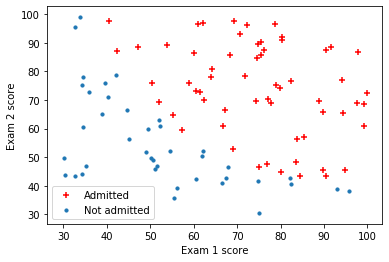

In [83]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)

In [98]:
def sigmoid(z):    #the sigmoid function that differentiates logistic regression from linear regression
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))
# testing the sigmoid function
sigmoid(0)

0.5

In [0]:
def costFunction(theta, X, y):            ##https://www.internalpointers.com/post/cost-function-logistic-regression
    """
    Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    """
    
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))          
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0] , grad

In [121]:
X.shape

(100, 3)

In [116]:
m , n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)
X= np.append(np.ones((m,1)),X,axis=1)      #axis=1 is direction along column and axis 0 is direction along row
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
cost, grad= costFunction(initial_theta,X,y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.693147180559946
Gradient at initial theta (zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [0]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [0]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [0]:
theta , J_history = gradientDescent(X,y,initial_theta,0.5,800)


In [125]:
theta

array([[0.6722732 ],
       [1.77602939],
       [1.60262573]])

In [126]:
J_history

[0.693147180559946,
 0.6855894675711963,
 0.6782153888526379,
 0.6710203905223747,
 0.6639999648517432,
 0.6571496567868919,
 0.6504650698186558,
 0.6439418712213744,
 0.637575796684609,
 0.6313626543643124,
 0.6252983283820565,
 0.6193787818023787,
 0.6136000591192986,
 0.6079582882835716,
 0.6024496823023865,
 0.5970705404430042,
 0.5918172490713234,
 0.5866862821556196,
 0.5816742014647508,
 0.5767776564890091,
 0.5719933841105561,
 0.5673182080490676,
 0.5627490381067937,
 0.558282869235843,
 0.5539167804490226,
 0.5496479335941461,
 0.5454735720102891,
 0.5413910190830745,
 0.5373976767147287,
 0.5334910237233443,
 0.5296686141845341,
 0.5259280757274936,
 0.522267107796344,
 0.518683479886599,
 0.5151750297655859,
 0.5117396616847395,
 0.5083753445908278,
 0.5050801103423617,
 0.5018520519367174,
 0.49868932175281344,
 0.4955901298135648,
 0.4925527420717707,
 0.48957547872257173,
 0.4866567125451389,
 0.4837948672758298,
 0.4809884160146672,
 0.47823587966663733,
 0.475535825419

Text(0.5, 1.0, 'Cost function using Gradient Descent')

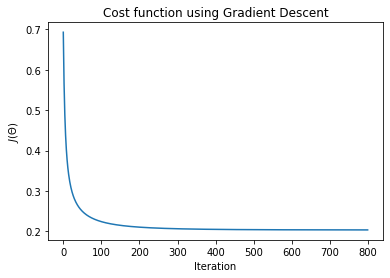

In [144]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

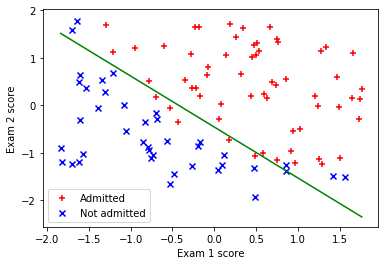

In [145]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

In [146]:
x_test = np.array([45,85])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a student with scores 45 and 85, we predict an admission probability of",prob[0])

For a student with scores 45 and 85, we predict an admission probability of 0.7676838497993853


In [0]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0

In [151]:
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %
